# Análise exploratória de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Leitura da base de dados do repositório remoto.

In [2]:
# Leitura da base de dados
df = pd.read_csv("../data/raw/doencas_cardiacas.csv")

## Glossário de Termos Médicos:

O glossário a seguir apresenta definições sobre os termos médicos, mais específicos, presentes no DataSet:

- **Açúcar no sangue em jejum**:  
  Nível de glicose medido no sangue do paciente durante o período de jejum. Valores superiores a 120 mg/dL podem indicar a presença de diabetes.

- **Angina**:  
  Dor no peito provocada pela falta de oxigenação do coração, que pode ser causada pelo estreitamento das artérias coronárias.

- **Colesterol**:  
  Tipo de gordura necessária para o funcionamento do corpo, mas que, em excesso, pode aumentar o risco de doenças cardiovasculares.

- **Depressão do segmento ST**:  
  Grau de desvio para baixo do segmento ST no eletrocardiograma do paciente durante o exercício, comparado ao estado de repouso. Indica possível isquemia (falta de oxigênio no coração).

- **ECG em repouso**:  
  Resultado de um eletrocardiograma realizado enquanto o paciente está em repouso, para avaliar a atividade elétrica do coração.

- **Taxa de batimentos máxima**:  
  Refere-se à **frequência cardíaca máxima**, a maior frequência alcançada pelo paciente durante o exercício ou esforço físico.

- **Inclinação do segmento ST**:  
  Direção do segmento ST no eletrocardiograma do paciente durante o exercício, indicando a reação do coração ao esforço:
  - **1** = Cima (indicativo de lesão cardíaca).
  - **2** = Plano (normalidade).
  - **3** = Baixo (indica isquemia, falta de sangue).

- **Segmento ST**:  
  Parte do eletrocardiograma que representa a atividade elétrica do coração entre a contração e o relaxamento dos ventrículos, ajudando na detecção de problemas cardíacos.

- **Tipo de dor no peito**:  
  Descrição da dor no peito experimentada pelo paciente. Pode ser:
  - **Angina típica ou clássica**: Dor no peito provocada pela redução do fluxo sanguíneo para o coração.
  - **Angina atípica**: Dor no peito com características diferentes da angina típica, como ocorrer em repouso.
  - **Dor não-anginosa**: Dor que não está relacionada a problemas cardíacos.
  - **Assintomático**: Não há dor no peito, mas o paciente pode ter outros sintomas cardíacos.

## 1. Descrição dos dados.

### Display do dicionário de dados.

In [3]:
dictionary = pd.read_csv("../data/external/dicionario.csv")
display(dictionary)

,Unnamed: 0,variavel,descrição,tipo,subtipo
0,0,age,Idade,Quantitativa,Discreta
1,1,sex,Sexo,Qualitativa,Nominal
2,2,chest pain type,Tipo de dor no peito,Qualitativa,Ordinal
3,3,resting bp s,Pressão arterial em repouso,Quantitativa,Contínua
4,4,cholesterol,Colesterol,Quantitativa,Contínua
5,5,fasting blood sugar,Açúcar no sangue em jejum > 120mg/dl,Qualitativa,Nominal
6,6,resting ecg,Eletrocardiograma em repouso,Qualitativa,Nominal
7,7,max heart rate,Frequência cardíaca máxima,Quantitativa,Contínua
8,8,exercise angina,Angina induzida por exercício,Qualitativa,Nominal
9,9,oldpeak,Depressão do segmento ST,Quantitativa,Contínua


### -Tratamento de dados.

In [4]:
## Mudando nome de colunas.
df.rename(columns = {
            "age" : "idade",
            "sex" : "sexo",
            "chest pain type" : "tipo de dor no peito",
            "resting bp s" : "pressão arterial em repouso",
            "cholesterol" : "colesterol",
            "fasting blood sugar" : "açúcar no sangue em jejum",
            "resting ecg" : "ECG em repouso",
            "max heart rate" : "taxa de batimentos máxima",
            "exercise angina" : "angina em exercício",
            "oldpeak" : "depressão do segmento ST",
            "ST slope" : "inclinação do segmento ST",
            "target" : "alvo"
            }, inplace = True)

## Validação do DataFrame.
display(df)

,idade,sexo,tipo de dor no peito,pressão arterial em repouso,colesterol,açúcar no sangue em jejum,ECG em repouso,taxa de batimentos máxima,angina em exercício,depressão do segmento ST,inclinação do segmento ST,alvo
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


### -Validação de tipos.

In [5]:
## Contagem de valores ausentes.
print("\nValores ausentes em cada coluna:")
display(df.isnull().sum())
print("\n")

# Exibe os tipos de cada coluna.
print("Tipos de dados de cada coluna:")
print(df.dtypes)
print("\n")

# Filtra as linhas duplicadas e conta a quantidade.
duplicate = df[df.duplicated()]
num_duplicate = duplicate.shape[0]

# Exibe as linhas duplicadas e a contagem.
print(f"\nNúmero total de linhas duplicadas: {num_duplicate}")


Valores ausentes em cada coluna:


idade                          0
sexo                           0
tipo de dor no peito           0
pressão arterial em repouso    0
colesterol                     0
açúcar no sangue em jejum      0
ECG em repouso                 0
taxa de batimentos máxima      0
angina em exercício            0
depressão do segmento ST       0
inclinação do segmento ST      0
alvo                           0
dtype: int64



Tipos de dados de cada coluna:
idade                            int64
sexo                             int64
tipo de dor no peito             int64
pressão arterial em repouso      int64
colesterol                       int64
açúcar no sangue em jejum        int64
ECG em repouso                   int64
taxa de batimentos máxima        int64
angina em exercício              int64
depressão do segmento ST       float64
inclinação do segmento ST        int64
alvo                             int64
dtype: object



Número total de linhas duplicadas: 272


### -Primeiros prints.

In [6]:
## Prints de visualização do DataFrame.
print('Primeiras linhas:\n')
display(df.head())
print("\nÚltimas linhas:\n")
display(df.tail())
print("\nNúmero total de linhas e colunas:")
display(df.shape)

## Resumo estatístico de colunas numéricas.
display(df.describe())

# Validação de colunas numéricas.
print("\nValores exploratórios, validação de cada coluna: ")
print(f"A idade mínima é {df['idade'].abs().min()}, a idade máxima é {df['idade'].abs().max()}, e a idade média é {df['idade'].abs().mean():.2f}")
print(f"O bp's mínimo é {df['pressão arterial em repouso'].abs().min()}, o bp's máximo é {df['pressão arterial em repouso'].abs().max()}, e o bp's médio é {df['pressão arterial em repouso'].abs().mean():.2f}")
print(f"O colesterol mínimo é {df['colesterol'].abs().min()}, o colesterol máximo é {df['colesterol'].abs().max()}, e o colesterol média é {df['colesterol'].abs().mean():.2f}")
print(f"A maior frequência cardíaca mínima é {df['taxa de batimentos máxima'].abs().min()}, a maior frequência cardíaca máxima é {df['taxa de batimentos máxima'].abs().max()}, e a maior frequência cardíaca média é {df['taxa de batimentos máxima'].abs().mean():.2f}")
print(f"A depressão do ST mínimo é {df['depressão do segmento ST'].min()}, a depressão do ST máxima é {df['depressão do segmento ST'].abs().max()}, e a depressão do ST média é {df['depressão do segmento ST'].mean():.2f}")

Primeiras linhas:



,idade,sexo,tipo de dor no peito,pressão arterial em repouso,colesterol,açúcar no sangue em jejum,ECG em repouso,taxa de batimentos máxima,angina em exercício,depressão do segmento ST,inclinação do segmento ST,alvo
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0



Últimas linhas:



,idade,sexo,tipo de dor no peito,pressão arterial em repouso,colesterol,açúcar no sangue em jejum,ECG em repouso,taxa de batimentos máxima,angina em exercício,depressão do segmento ST,inclinação do segmento ST,alvo
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0



Número total de linhas e colunas:


(1190, 12)

,idade,sexo,tipo de dor no peito,pressão arterial em repouso,colesterol,açúcar no sangue em jejum,ECG em repouso,taxa de batimentos máxima,angina em exercício,depressão do segmento ST,inclinação do segmento ST,alvo
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000



Valores exploratórios, validação de cada coluna: 
A idade mínima é 28, a idade máxima é 77, e a idade média é 53.72
O bp's mínimo é 0, o bp's máximo é 200, e o bp's médio é 132.15
O colesterol mínimo é 0, o colesterol máximo é 603, e o colesterol média é 210.36
A maior frequência cardíaca mínima é 60, a maior frequência cardíaca máxima é 202, e a maior frequência cardíaca média é 139.73
A depressão do ST mínimo é -2.6, a depressão do ST máxima é 6.2, e a depressão do ST média é 0.92


In [7]:
## Outras validações estatísticas.
print("Estatísticas para a idade do paciente:")
print(f"  Mediana: {df['idade'].median()}")
print(f"  Moda: {df['idade'].mode()[0]}")
print(f"  Desvio Padrão: {df['idade'].std()}")
print(f"  Variância: {df['idade'].var()}")

print("\nEstatísticas para o pressão arterial em repouso do paciente:")
print(f"  Mediana: {df['pressão arterial em repouso'].median()}")
print(f"  Moda: {df['pressão arterial em repouso'].mode()[0]}")
print(f"  Desvio Padrão: {df['pressão arterial em repouso'].std()}")
print(f"  Variância: {df['pressão arterial em repouso'].var()}")

print("\nEstatísticas para o colesterol do paciente:")
print(f"  Mediana: {df['colesterol'].median()}")
print(f"  Moda: {df['colesterol'].mode()[0]}")
print(f"  Desvio Padrão: {df['colesterol'].std()}")
print(f"  Variância: {df['colesterol'].var()}")

print("\nEstatísticas para a taxa de batimentos máxima do paciente:")
print(f"  Mediana: {df['taxa de batimentos máxima'].median()}")
print(f"  Moda: {df['taxa de batimentos máxima'].mode()[0]}")
print(f"  Desvio Padrão: {df['taxa de batimentos máxima'].std()}")
print(f"  Variância: {df['taxa de batimentos máxima'].var()}")

print("\nEstatísticas para a depressão do segmento ST do paciente:")
print(f"  Mediana: {df['depressão do segmento ST'].median()}")
print(f"  Moda: {df['depressão do segmento ST'].mode()[0]}")
print(f"  Desvio Padrão: {df['depressão do segmento ST'].std()}")
print(f"  Variância: {df['depressão do segmento ST'].var()}")

Estatísticas para a idade do paciente:
  Mediana: 54.0
  Moda: 54
  Desvio Padrão: 9.358202797635386
  Variância: 87.57595960167077

Estatísticas para o pressão arterial em repouso do paciente:
  Mediana: 130.0
  Moda: 120
  Desvio Padrão: 18.36882341526594
  Variância: 337.4136736612223

Estatísticas para o colesterol do paciente:
  Mediana: 229.0
  Moda: 0
  Desvio Padrão: 101.42048904518876
  Variância: 10286.115598165254

Estatísticas para a taxa de batimentos máxima do paciente:
  Mediana: 140.5
  Moda: 150
  Desvio Padrão: 25.517635548982874
  Variância: 651.1497240107144

Estatísticas para a depressão do segmento ST do paciente:
  Mediana: 0.6
  Moda: 0.0
  Desvio Padrão: 1.0863372185219862
  Variância: 1.1801285523460856


In [8]:
# Define paletas e cor do background
bg_color = "#ECA"
c_palette = 'flare'
d_palette = sns.diverging_palette(9, 313, s=49, as_cmap=True)

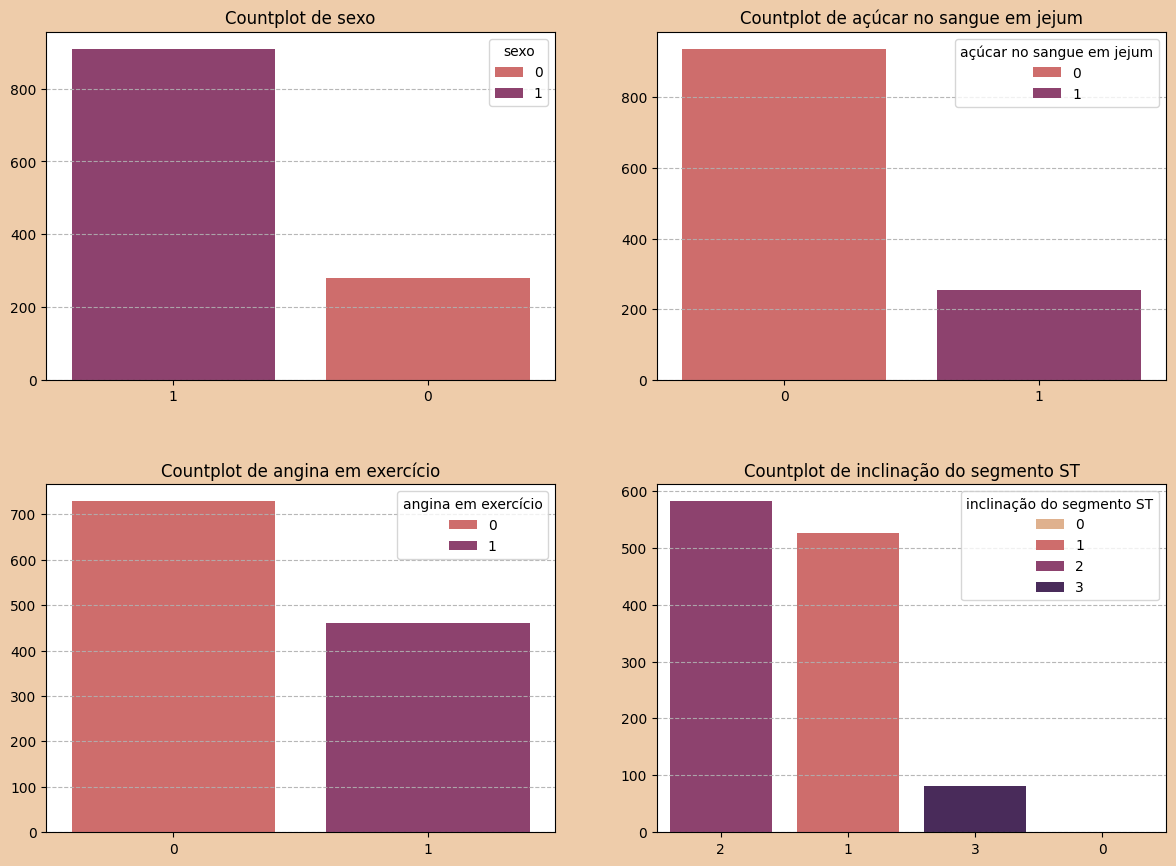

In [9]:
# Crie a estrutura de subplots.
fig, axes = plt.subplots(2, 2, figsize = (14, 10), gridspec_kw = {'wspace': 0.2, 'hspace': 0.3})

# Definir cor de fundo da figura.
fig.set_facecolor(bg_color)

# Linha 0 - Countplots.
sns.countplot(data = df, x = 'sexo', palette = c_palette, hue = 'sexo',
              ax = axes[0, 0], order = df['sexo'].value_counts().index)
axes[0, 0].set_title('Countplot de sexo', fontsize = 12)
axes[0, 0].set_xlabel('', fontsize = 8)
axes[0, 0].set_ylabel('', fontsize = 8)
axes[0, 0].grid(True, axis = 'y', linestyle = '--', alpha = 0.9)

sns.countplot(data = df, x = 'açúcar no sangue em jejum', palette = c_palette,
              hue = 'açúcar no sangue em jejum', ax = axes[0, 1], order = df['açúcar no sangue em jejum'].value_counts().index)
axes[0, 1].set_title('Countplot de açúcar no sangue em jejum', fontsize = 12)
axes[0, 1].set_xlabel('', fontsize = 8)
axes[0, 1].set_ylabel('', fontsize = 8)
axes[0, 1].grid(True, axis = 'y', linestyle = '--', alpha = 0.9)

# Linha 1 - Countplots.
sns.countplot(data = df, x = 'angina em exercício', palette = c_palette, hue = 'angina em exercício',
              ax = axes[1, 0], order = df['angina em exercício'].value_counts().index)
axes[1, 0].set_title('Countplot de angina em exercício', fontsize = 12)
axes[1, 0].set_xlabel('', fontsize = 8)
axes[1, 0].set_ylabel('', fontsize = 8)
axes[1, 0].grid(True, axis = 'y', linestyle = '--', alpha = 0.9)

sns.countplot(data = df, x = 'inclinação do segmento ST', palette = c_palette, hue = 'inclinação do segmento ST',
              ax = axes[1, 1], order = df['inclinação do segmento ST'].value_counts().index)
axes[1, 1].set_title('Countplot de inclinação do segmento ST', fontsize=12)
axes[1, 1].set_xlabel('', fontsize = 8)
axes[1, 1].set_ylabel('', fontsize = 8)
axes[1, 1].grid(True, axis = 'y', linestyle = '--', alpha = 0.9)

# Exibe o gráfico.
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

## 2. Perguntas de partida e hipóteses

#### 1 - Qual a relação entre a glicemia e a presença de doenças cardíacas?

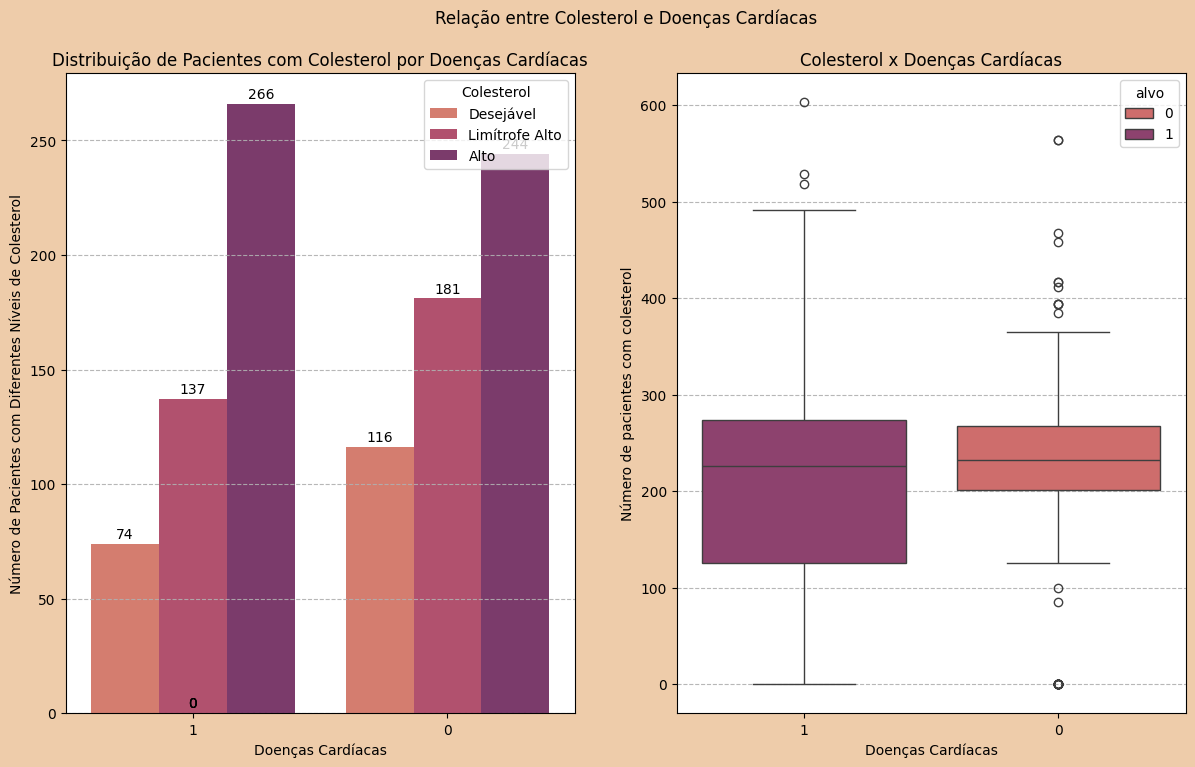

In [10]:
# Crie a estrutura de subplots
fig, axes = plt.subplots(1,2 , figsize = (14, 8), gridspec_kw = {'wspace': 0.2, 'hspace': 0.3})
fig.set_facecolor(bg_color)

#Título do gráfico
plt.suptitle("Relação entre Colesterol e Doenças Cardíacas")

#Agrupamento do colesterol e o alvo, size = retorna os valores
contagem = df.groupby(['colesterol', 'alvo']).size()

# Definindo intervalos para colesterol, segundo OMS
df['colesterol_categoria'] = pd.cut(df['colesterol'], 
                                    bins=[0, 200, 239, float('inf')],
                                    labels=['Desejável', 'Limítrofe Alto', 'Alto'])

# Gráfico de barras
sns.countplot(x='alvo', hue='colesterol_categoria', data=df, palette=c_palette, ax=axes[0],
             order = df['alvo'].value_counts().index)
#legenda
axes[0].set_title("Distribuição de Pacientes com Colesterol por Doenças Cardíacas")
axes[0].set_xlabel("Doenças Cardíacas")
axes[0].set_ylabel("Número de Pacientes com Diferentes Níveis de Colesterol")
#definição das linhas horizontal tracejadas
axes[0].grid(True, axis='y', linestyle='--', alpha=0.9)
#legenda do gráfico
axes[0].legend(title="Colesterol", loc='upper right')

#numeros no topo da barra
for p in axes[0].patches:
    height = round(p.get_height())  
    axes[0].annotate(f'{height}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', xytext=(0, 7), 
                     textcoords='offset points')

#Gráfico em boxplot
sns.boxplot(x='alvo', y='colesterol', data=df, palette=c_palette, ax = axes[1],
            hue = 'alvo',
           order = df['alvo'].value_counts().index)
#Legenda
axes[1].set_title("Colesterol x Doenças Cardíacas")
axes[1].set_xlabel("Doenças Cardíacas")
axes[1].set_ylabel("Número de pacientes com colesterol")
#definição das linhas horizontal tracejadas
axes[1].grid(True, axis = 'y', linestyle = '--', alpha = 0.9)

# Exibe o gráfico.
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

In [21]:
c_df = df.drop(columns=['colesterol_categoria'])

c_df

,idade,sexo,tipo de dor no peito,pressão arterial em repouso,colesterol,açúcar no sangue em jejum,ECG em repouso,taxa de batimentos máxima,angina em exercício,depressão do segmento ST,inclinação do segmento ST,alvo
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


#### 2 - Quais variáveis têm maior influência sobre o risco de doenças cardíacas (alvo)?

In [22]:
c_df = pd.get_dummies(c_df, drop_first = True)

c_df.dtypes

idade                            int64
sexo                             int64
tipo de dor no peito             int64
pressão arterial em repouso      int64
colesterol                       int64
açúcar no sangue em jejum        int64
ECG em repouso                   int64
taxa de batimentos máxima        int64
angina em exercício              int64
depressão do segmento ST       float64
inclinação do segmento ST        int64
alvo                             int64
dtype: object

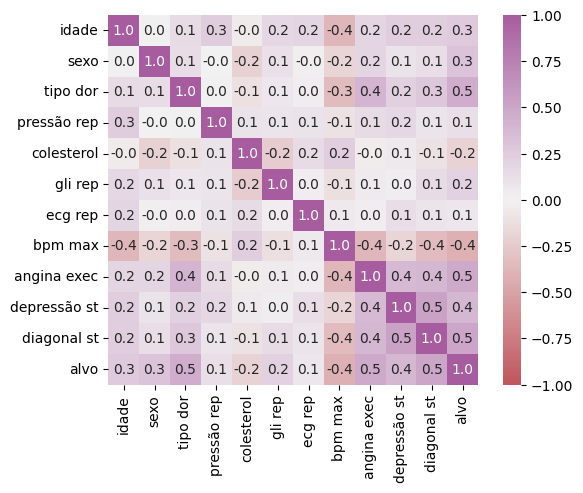

In [29]:
corr_matrix = c_df.corr(numeric_only=True)

# Cria labels menores para visualização
short_labels = [
    'idade',
    'sexo',
    'tipo dor',
    'pressão rep',
    'colesterol',
    'gli rep',
    'ecg rep',
    'bpm max',
    'angina exec',
    'depressão st',
    'diagonal st',
    'alvo',
]

# Plotando o heatmap da correlação
sns.heatmap(c_df.corr(), cmap = d_palette, annot = True,
           fmt = '.1f', square = True,
           vmax = 1, vmin = -1,
           xticklabels = short_labels,
           yticklabels = short_labels)

plt.show()

#### 3 - Quais padrões podem ser encontrados que indiquem populações de alto risco?

Uma maneira interessante de identificar insights para essa informação é verificar variáveis relacionadas a fatores de risco já conhecidos para cardiopatias. Dentro do nosso dataset, podemos usar idade, sexo, pressão sanguínea, colesterol e frequência cardíaca máxima como exemplos, tal como tipos de dor no peito para aferência.

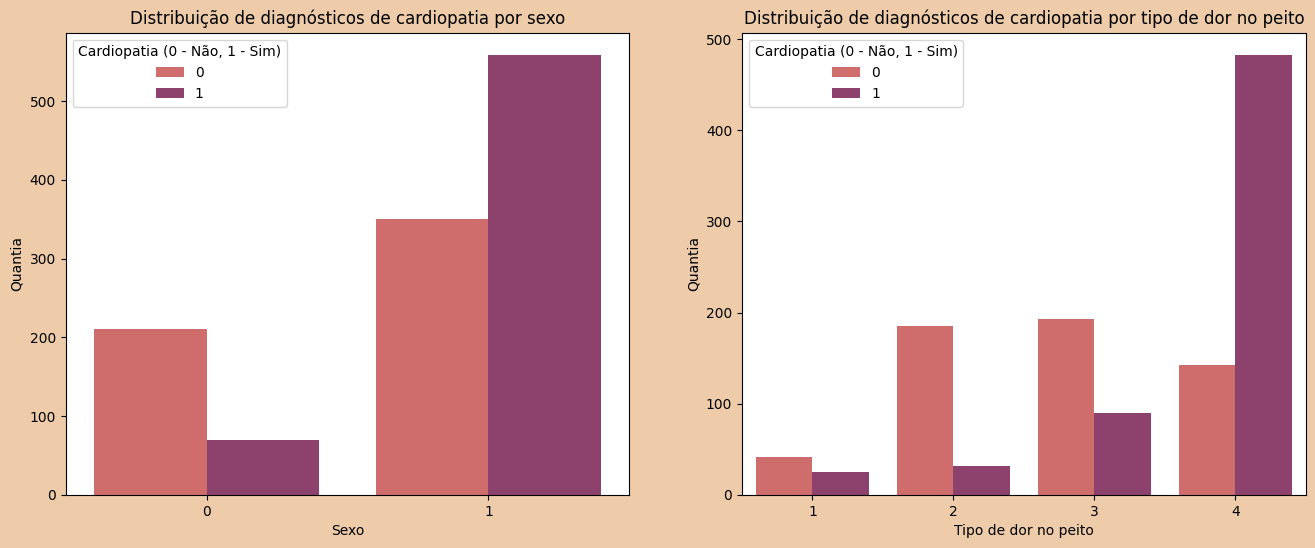

In [14]:
# Cria uma grid com duas figures de dimensões 8(16) por 6
fig, axes = plt.subplots(1, 2, figsize = (16, 6))
fig.set_facecolor(bg_color)

# Aqui, o eixo x identifica o sexo, o eixo y identifica a quantia, e a cor - aplicada sob a paleta,
# identifica o "alvo" - se possui ou não uma cardiopatia.
sns.countplot(data = df, x = 'sexo', ax = axes[0],
              hue = 'alvo', palette = c_palette)
axes[0].set_title('Distribuição de diagnósticos de cardiopatia por sexo')
axes[0].set_xlabel('Sexo')
axes[0].set_ylabel('Quantia')
axes[0].legend(title = 'Cardiopatia (0 - Não, 1 - Sim)')

# Cria um gráfico idêntico, mas que usa o tipo de dor no peito no lugar do sexo
sns.countplot(data = df, x = 'tipo de dor no peito', ax = axes[1],
              hue = 'alvo', palette = c_palette)
axes[1].set_title('Distribuição de diagnósticos de cardiopatia por tipo de dor no peito')
axes[1].set_xlabel('Tipo de dor no peito')
axes[1].set_ylabel('Quantia')
axes[1].legend(title = 'Cardiopatia (0 - Não, 1 - Sim)')

plt.show()

É possível perceber que, dentro do recorte do dataset, homens possuem uma tendência maior que mulheres a ter problemas cardíacos. Isso pode ser, também, devido ao fato do conjunto possuir um maior número de homens do que de mulheres. Mais uma vez, para verificar a quantia de cada um dos grupos:

In [15]:
# Conta o número de mulheres (0) e homens (1)
count_s = df['sexo'].value_counts()

# Cria uma tabela mais apresentável
table_s = pd.DataFrame({
    'Sexo': ['Homem', 'Mulher'],
    'Quantia': [count_s.iloc[0], count_s.iloc[1]]
})

table_s

,Sexo,Quantia
0,Homem,909
1,Mulher,281


É importante, portanto, ao analisar os dados relacionados à sexo, que mulheres, de fato, são minoria neste conjunto, a fim de evitar conclusões enviesadas.

Com relação à tipos de dor no peito, no entanto, surge uma curiosidade: pacientes assintomáticos são **o maior grupo de risco** dentre os tipos de dor.

Agora, vamos relacionar fatores como idade e colesterol à risco de cardiopatia, tentando compreender quaisquer relações entre essas características:

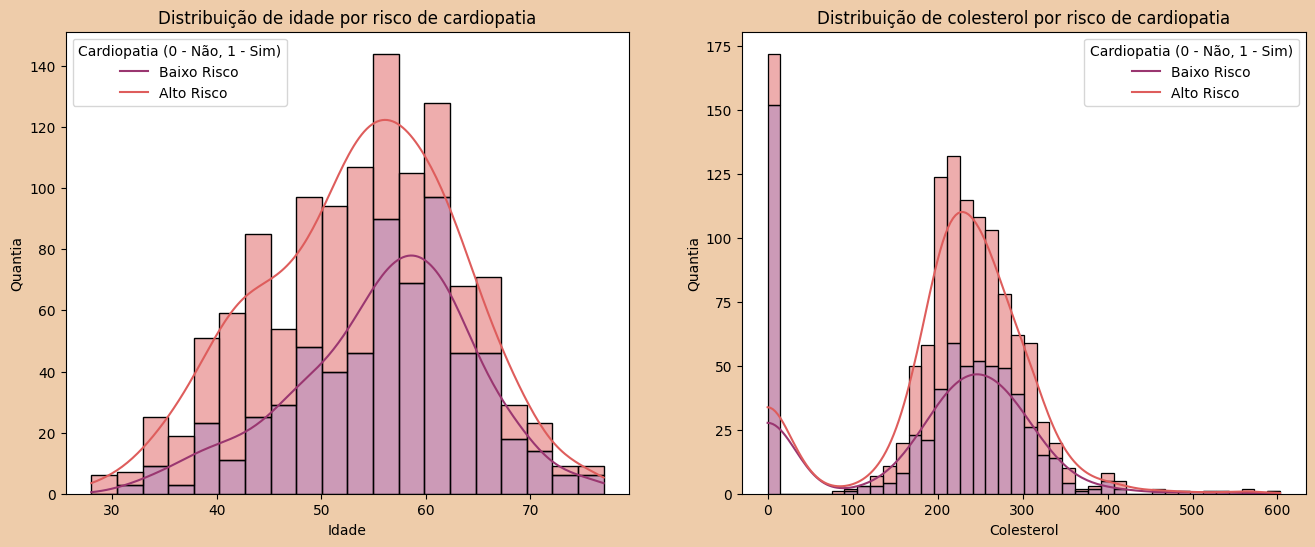

In [16]:
# Cria uma grid com duas figures de dimensões 8(16) por 6
fig, axes = plt.subplots(1, 2, figsize = (16, 6))
fig.set_facecolor(bg_color)

# Agora, criamos um histograma numa KDE para a idade das amostras
sns.histplot(data = df, x = 'idade', kde = True, ax = axes[0],
             hue = 'alvo', palette = c_palette,
             multiple = 'stack')
axes[0].set_title('Distribuição de idade por risco de cardiopatia')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Quantia')
axes[0].legend(title = 'Cardiopatia (0 - Não, 1 - Sim)',
               labels = ['Baixo Risco', 'Alto Risco'])

# E fazemos a mesma coisa, mas com colesterol
sns.histplot(data = df, x = 'colesterol', kde = True, ax = axes[1],
             hue = 'alvo', palette = c_palette,
             multiple = 'stack')
axes[1].set_title('Distribuição de colesterol por risco de cardiopatia')
axes[1].set_xlabel('Colesterol')
axes[1].set_ylabel('Quantia')
axes[1].legend(title = 'Cardiopatia (0 - Não, 1 - Sim)',
               labels = ['Baixo Risco', 'Alto Risco'])

plt.show()

Neste histograma, é possível perceber que a idade é uma variável interessante ao que diz respeito ao risco de cardiopatia: embora o risco seja claramente existente entre todas as amostras de idade, é entre os 50 e 60 anos que ele mostra seu pico.

Um fator curioso no histograma é que, embora o número de amostras acima de 60 anos reduza, a frequência de cardiopatas se torna muito maior.

Com relação ao colesterol, é possível observar uma alta frequência de cardiopatas com colesterol superior à 200mg/dl, com o maior número de cardiopatas por grupo de amostra surgindo à partir de 300mg/dl.

Por fim, uma breve análise utilizando pairplots para exibir agrupamentos entre variáveis cruzadas:

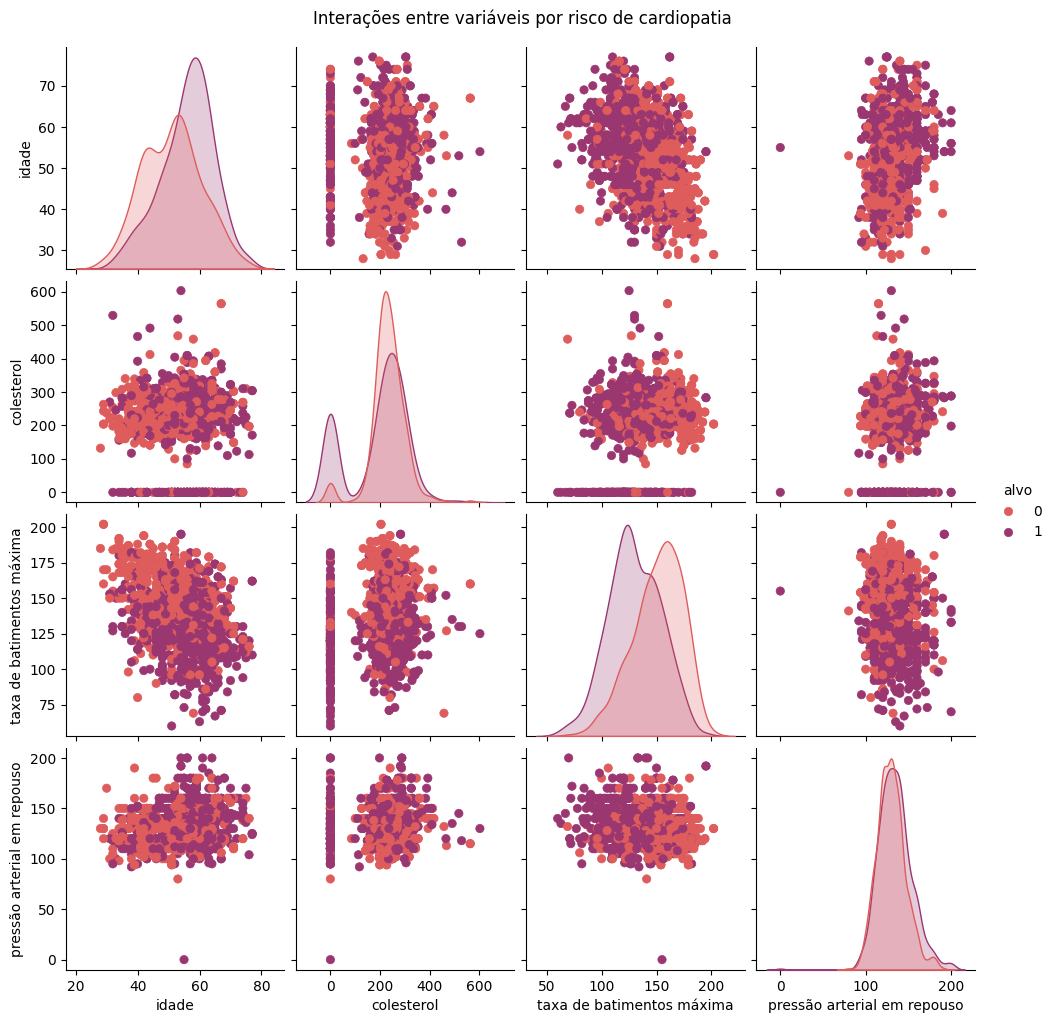

In [17]:
# Cria um pairplot com algumas variáveis de interesse, colorido pelo alvo
sns.pairplot(df, vars = ['idade', 'colesterol',
                       'taxa de batimentos máxima', 'pressão arterial em repouso'],
             hue = 'alvo', palette = c_palette,
             plot_kws = dict(edgecolor = None),
             diag_kind = 'kde')
plt.suptitle('Interações entre variáveis por risco de cardiopatia', y = 1.02)
fig.set_facecolor(bg_color)
plt.show()

## 3. Insights

#### 3.1 - Pacientes com colesterol alto tendem a desenvolver doenças cardíacas.
Ao analisar os gráficos, pode-se observar que a quantidade de pacientes com colesterol desejável que são cardíacos é pequena, representando menos de 12%. Isso provavelmente se deve a outros fatores, como histórico familiar ou estilo de vida. No entanto, ao observar os pacientes cardíacos com colesterol alto, eles representam aproximadamente 42,2%, enquanto os pacientes não cardíacos com colesterol alto representam cerca de 43,5%. Essa análise revela uma discrepância pequena entre as duas porcentagens, indicando que a presença de colesterol alto não está diretamente associada a um maior risco de doenças cardíacas. A hipótese inicial era de que os pacientes com colesterol alto seriam majoritariamente cardíacos, mas, ao analisar os gráficos e cálculos, observa-se que não há uma relação significativa entre ter colesterol alto e alguma doença cardíaca. Esses resultados sugerem que as doenças cardíacas podem estar mais relacionadas a fatores genéticos do que exclusivamente ao colesterol.

#### 3.2 - Fatores como angina em exercício, tipo de angina e a elevação ST são fortes indicadores de cardiopatias.
É possível atrelar essas características à condição de cardiopata por conta da sua alta relação (> 0) com indivíduos no grupo de cardiopatia (alvo = 1). Essa análise foi feita utilizando uma matriz de correlação, que permite a visualização numérica em um intervalo definido entre -1 e 1 e indica quais variáveis possuem uma maior ocorrência simultânea de seus valores com relação ao valor-alvo.

#### 3.3 - Colesterol e idade são características fortemente relacionadas à cardiopatias.
Embora a análise inicial indique que pacientes com alto nível de colesterol e de idades avançadas (>60) sejam majoritariamente cardiopatas, ela também indica que pacientes do sexo masculino são o maior grupo de cardiopatas, o que pode ser apenas um viés. É possível identificar, também, no pairplot, que maiores pressões arteriais em repouso, em conjunto com baixas taxas de batimentos, possuem uma concentração de pacientes cardiopatas.